<h1>Top Rated 9000 Movies On TMBD</h1>
<div>
    <h2>Abstract</h2>
    <p>Data is retrieved from a dataset. Afterwards using EDA(Exploratory Data Analysis), numerous deductions are made and a machine learning model is built to make predictions.
    </p>
    <h2>Inroduction</h2>
    <p>
        EDA (Exploratory Data Analysis), is the process of analyzing and summarizing main concepts in a data structure, normally using 
        visual techniques. The goal is to find anomalies, patterns, check assumptions and find the relationship between variables in the data
        before using a more complex modeling technique. EDA ensures that data is clean and balanced for further analysis. In EDA, numerous steps
        are taken to make data more appealing and understandble; Data Summarization ( mean, meadian, erros... ), Data Visualization,Handling Missing
        Values and Outliers, and Correlation Analysis. These steps are in no particular order.
    </p>
    <h2>Methodology</h2>
    <p>
        <li>
            Import pandas, numpy, keras, seaborn, sklearn for data analysis and machine learning
        </li>
        <li>
            Retrieve the data from the dataset <i>top_rated_9000_movies_on_TMDB.csv</i> using pandas library
        </li>
        <li>
            Separate the data by genre ( ["Drama","Crime"] ) and language ( "en" )
        </li>
        <li>
            Using EDA(Exploratory Data Analysis), make meanful insights from the data
        </li>
        <li>
            Build a machine learning model which can predict popularity
        </li>
    </p>
    <h2>Discussion</h2>
    <p>
        The selected data (["vote_count","vote_average","popularity"]) were cleaned and analyzed to make prediction. Since the output 
        variable selected was popularity, a machine learning model was built to Handle regression. However upon testing, the model performed averagely with 11.4957 as score for root_mean_squared_error and 0.491 as value for r2_score. For innstance,
        [25.326723 : 7.040123], and [24.463 : 9.065] (predicted values : true values respectively).
    </p>
    <h2>Conclusion</h2>
    <p>
        From deductions, massive perfromance boost may be achieved with futher analysis and data input.
    </p>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv(filepath_or_buffer="top_rated_9000_movies_on_TMDB.csv")
dataset.head()

,id,title,original_language,release_date,vote_average,vote_count,popularity,overview,genre_ids,Genres
0,278,The Shawshank Redemption,en,1994-09-23,8.706,26840,150.307,Imprisoned in the 1940s for the double murder ...,"[18, 80]","['Drama', 'Crime']"
1,238,The Godfather,en,1972-03-14,8.690,20373,122.973,"Spanning the years 1945 to 1955, a chronicle o...","[18, 80]","['Drama', 'Crime']"
2,240,The Godfather Part II,en,1974-12-20,8.575,12291,94.204,In the continuing saga of the Corleone crime f...,"[18, 80]","['Drama', 'Crime']"
3,424,Schindler's List,en,1993-12-15,8.565,15695,74.615,The true story of how businessman Oskar Schind...,"[18, 36, 10752]","['Drama', 'History', 'War']"
4,389,12 Angry Men,en,1957-04-10,8.546,8522,54.678,The defense and the prosecution have rested an...,[18],['Drama']


In [4]:
#let's select rows with eng as original language
en_lang=[]
for en_index,lang in dataset["original_language"].items():
    if lang=="en":
        en_lang.append(en_index)
#let's select the row with ["Drama","Crime"] as genre
genre=[]
for genre_index,gn in dataset["Genres"].items():
    if gn=="['Drama', 'Crime']":
        genre.append(genre_index)
#lets remove all the select the index from the dataset
valid_index=dataset.index.intersection(en_lang).intersection(genre)
selected_data=dataset.loc[valid_index]
selected_data.head()

,id,title,original_language,release_date,vote_average,vote_count,popularity,overview,genre_ids,Genres
0,278,The Shawshank Redemption,en,1994-09-23,8.706,26840,150.307,Imprisoned in the 1940s for the double murder ...,"[18, 80]","['Drama', 'Crime']"
1,238,The Godfather,en,1972-03-14,8.690,20373,122.973,"Spanning the years 1945 to 1955, a chronicle o...","[18, 80]","['Drama', 'Crime']"
2,240,The Godfather Part II,en,1974-12-20,8.575,12291,94.204,In the continuing saga of the Corleone crime f...,"[18, 80]","['Drama', 'Crime']"
15,769,GoodFellas,en,1990-09-12,8.462,12728,71.633,"The true story of Henry Hill, a half-Irish, ha...","[18, 80]","['Drama', 'Crime']"
29,311,Once Upon a Time in America,en,1984-05-23,8.413,5311,34.060,A former Prohibition-era Jewish gangster retur...,"[18, 80]","['Drama', 'Crime']"


In [5]:
#lets check for nulls
print(selected_data.isnull().sum())

id                   0
title                0
original_language    0
release_date         0
vote_average         0
vote_count           0
popularity           0
overview             0
genre_ids            0
Genres               0
dtype: int64


In [9]:
#lets check for outliers
outlier_index=[]
threshold=3
mean=np.mean(selected_data["vote_count"])
std=np.std(selected_data['vote_count'])
for out_ind, var in dataset["vote_count"].items():
    z_score=np.abs(var-mean)/std
    if z_score >= threshold:
        outlier_index.append(out_ind)
outlier=selected_data.index.intersection(outlier_index)
clean_data=selected_data.drop(outlier)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 1 to 9250
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 39 non-null     int64  
 1   title              39 non-null     object 
 2   original_language  39 non-null     object 
 3   release_date       39 non-null     object 
 4   vote_average       39 non-null     float64
 5   vote_count         39 non-null     int64  
 6   popularity         39 non-null     float64
 7   overview           39 non-null     object 
 8   genre_ids          39 non-null     object 
 9   Genres             39 non-null     object 
dtypes: float64(2), int64(2), object(6)
memory usage: 3.4+ KB


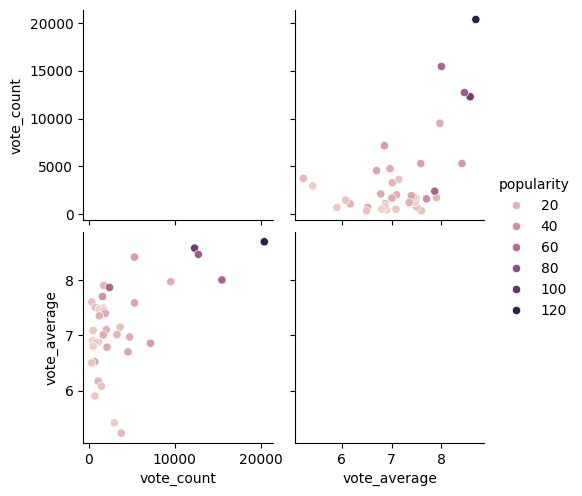

In [122]:
plt_clean_data=clean_data[["vote_count","vote_average","popularity"]]
sns.pairplot(plt_clean_data,hue="popularity")

In [17]:
input_data=clean_data[["vote_count","vote_average"]]
output_data=clean_data["popularity"]

In [35]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(input_data,output_data,test_size=0.2)
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train=scaler.fit_transform(train_input)
x_test=scaler.fit_transform(test_input)

In [27]:
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense
model=Sequential()
model.add(Dense(2,input_shape=(2,),activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(Dense(1))

c:\Users\julth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["root_mean_squared_error"])
model.fit(x_train,train_output,epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step - loss: 132.1740 - root_mean_squared_error: 11.4967
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 132.4447 - root_mean_squared_error: 11.5085
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 132.2549 - root_mean_squared_error: 11.5002
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 132.2508 - root_mean_squared_error: 11.5000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 132.3125 - root_mean_squared_error: 11.5027
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 132.2810 - root_mean_squared_error: 11.5013
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 132.2004 - root_mean_squared_error: 11.4978
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 132.1724 - root_mean_squared_error: 11.4966
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 132.2287 - root_mean_squared_error: 11.4991
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 132.2517 - root_mean_s

In [66]:
y_predicted=model.predict(x_test)
print(y_predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[25.326723 ]
 [ 7.040123 ]
 [22.026491 ]
 [46.56554  ]
 [24.313372 ]
 [ 7.5126133]
 [54.921158 ]
 [54.921158 ]]


In [69]:
print(test_output)

3376     24.463
3826      9.065
4610     28.519
29       34.060
3197     20.539
3811     15.740
15       71.633
1       122.973
Name: popularity, dtype: float64


In [70]:
from sklearn.metrics import root_mean_squared_error,r2_score
root_mean_squared_error(test_output,y_predicted)

25.484460995084245

In [121]:
r2_score(test_output,y_predicted)

0.49121007497757707

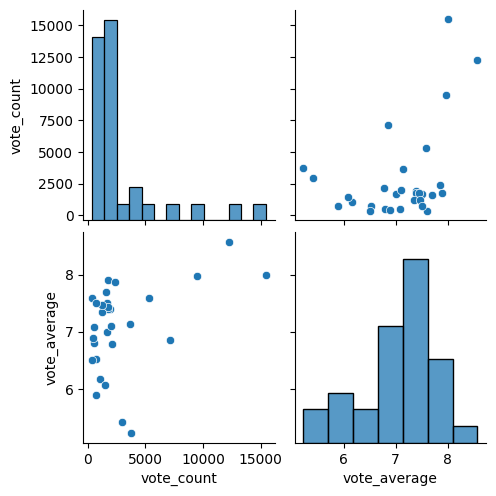

In [78]:
sns.pairplot(train_input)

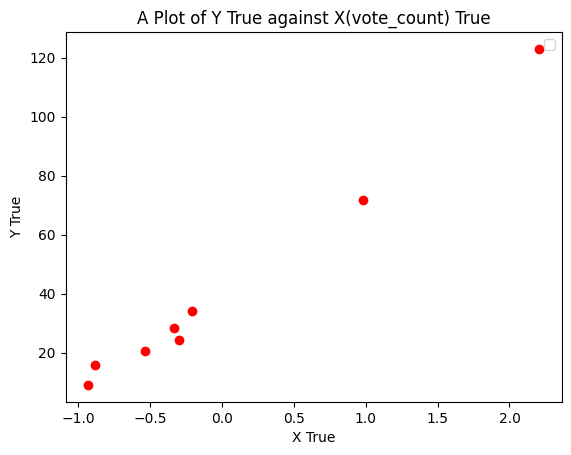

In [168]:
x_f=np.array(x_test[0:,0])
x_s=np.array(x_test[0:,1])
x1=[]
x2=[]
for x in x_f:
    x1.append(x)
for x in x_s:
    x2.append(x)
x1_arr=np.array(x1).reshape(-1,1)
x2_arr=np.array(x2).reshape(-1,1)
plt.scatter(x1_arr,test_output,color="red")
plt.xlabel("X True")
plt.ylabel("Y True")
plt.title("A Plot of Y True against X(vote_count) True")

plt.legend()

Text(0.5, 1.0, 'A Plot of Y True against X(vote_average) True')

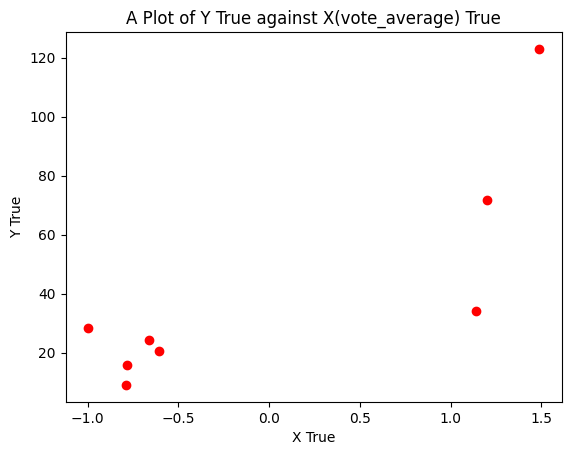

In [159]:
plt.scatter(x2_arr,test_output,color="red")
plt.xlabel("X True")
plt.ylabel("Y True")
plt.title("A Plot of Y True against X(vote_average) True")

Text(0.5, 1.0, 'A Plot of Y Predicted against X(vote_count) True')

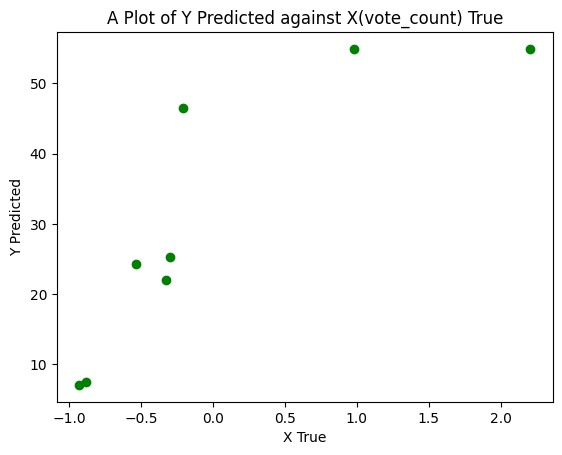

In [162]:
plt.scatter(x1_arr,y_predicted,color="green")
plt.xlabel("X True")
plt.ylabel("Y Predicted")
plt.title("A Plot of Y Predicted against X(vote_count) True")

Text(0.5, 1.0, 'A Plot of Y Predicted against X(vote_average) True')

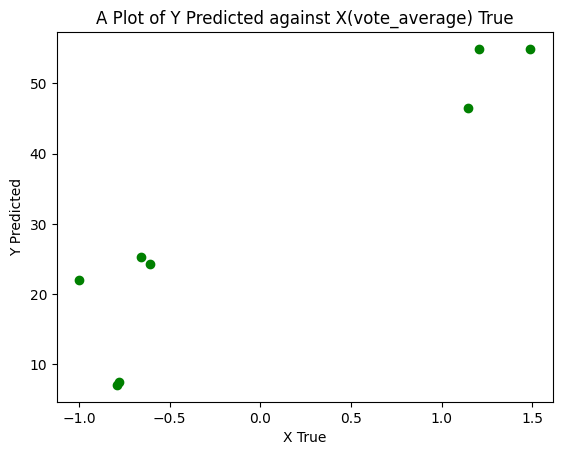

In [164]:
plt.scatter(x2_arr,y_predicted,color="green")
plt.xlabel("X True")
plt.ylabel("Y Predicted")
plt.title("A Plot of Y Predicted against X(vote_average) True")

In [166]:
from keras._tf_keras.keras.models import save_model
saved_model=save_model(model=model,filepath="TopRatedMoviesPrediction.h5")